In [3]:
#extra:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd
import IPython.display as ipd
import scipy as sp

from glob import glob
import math

from functions import *

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading all the audio files in one list:
folders = ['a', 'b', 'c', 'd', 'e', 'f']

audio_files = []
for folder in folders:
    audio = glob(f'/Users/mohammedlajam/Documents/GitHub/Datasets/Phonocardiogram/PhysioNet_2016/training-{folder}/*.wav')
    audio_files.append(audio)
audio_files = [item for elem in audio_files for item in elem]

# Loading the References:
references = []
for folder in folders:
    signal_csv = pd.read_csv(f'/Users/mohammedlajam/Documents/GitHub/Datasets/Phonocardiogram/PhysioNet_2016/training-{folder}/REFERENCE.csv', header=None)
    signal_csv.columns = ['signal_id', 'class']
    references.append(signal_csv)
signal_classes = pd.concat(references)
signal_classes.reset_index(inplace=True)
signal_classes.drop('index', inplace=True, axis=1)

In [5]:
normal_signal, processed_signal_normal = emd_dfilter(file_path=audio_files, audio_index=0, order=8, sr=1000, low_fc=100, high_fc=10, plot=False)
abnormal_signal, processed_signal_abnormal = emd_dfilter(file_path=audio_files, audio_index=6, order=8, sr=1000, low_fc=100, high_fc=10, plot=False)

In [6]:
def band_energy_ratio2(processed_signal, frame_size, hop_size, split_frequency, sr, plot=bool):
    # calculating the spectrogram:
    spec = librosa.stft(processed_signal, n_fft=frame_size, hop_length=hop_size)

    # calculating the split frequency bin
    frequency_range = sr / 2
    frequency_delta_per_bin = frequency_range / spec.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)

    # move to the power spectrogram:
    power_spectrogram = np.abs(spec) ** 2
    power_spectrogram = power_spectrogram.T

    # calculating the band energy ratio for each frame:
    ber = []
    for frequencies_in_frame in power_spectrogram:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:int(split_frequency_bin)])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[int(split_frequency_bin):])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        ber.append(ber_current_frame)

    # plotting the Band Energy Ratio:
    if plot:
        frames = range(len(ber))
        t = librosa.frames_to_time(frames, hop_length=hop_size)

        plt.figure(figsize=(15, 5))
        plt.plot(t, ber)
        return plt.show()
    else:
        return np.array(ber)

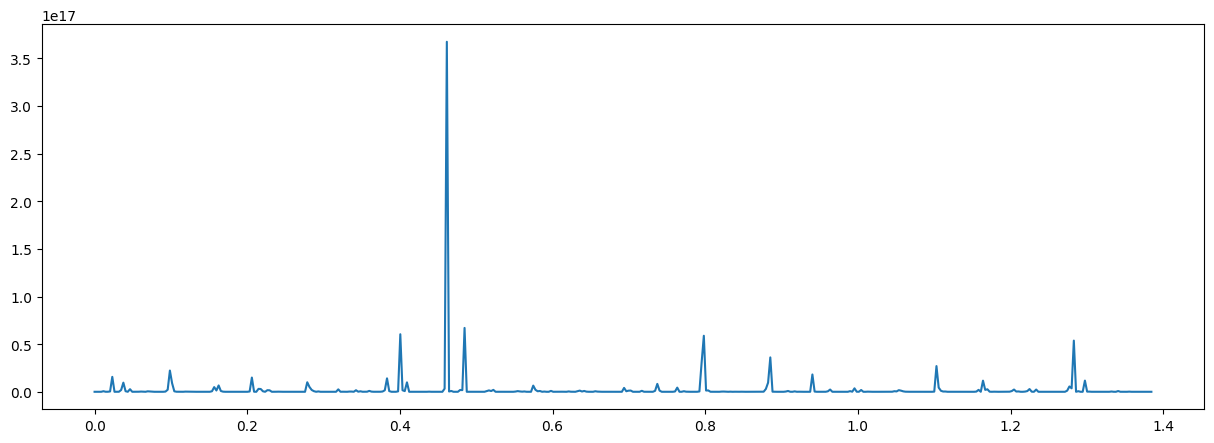

In [7]:
band_energy_ratio2(processed_signal=processed_signal_normal, frame_size=512, hop_size=64, split_frequency=256, sr=1000, plot=True)